In [5]:
# Validation in Field V6

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "V6")
import pcse
cropfile = os.path.join(data_dir, 'V4.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=15, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'V6_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2003-2004.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS,TSUM,TSUM1
day,,,,,,,,,,,,,,,
2004-05-23,1.930742,0.005184,4813.916432,1473.538806,1220.843994,2119.533633,513.547354,0.000135,55.0,0.178838,24.236111,0.0,0.020151,1336.011,None
2004-05-24,1.951550,0.000587,4813.916432,1473.538806,1220.843994,2119.533633,513.547354,0.000016,55.0,0.178470,24.215824,0.0,0.026130,1349.661,None
2004-05-25,1.973516,0.000000,4813.916432,1473.538806,1220.843994,2119.533633,513.547354,0.000000,55.0,0.177994,24.189679,0.0,0.019208,1364.071,None
2004-05-26,1.993859,0.000000,4813.916432,1473.538806,1220.843994,2119.533633,513.547354,0.000000,55.0,0.179463,24.270471,0.0,0.124120,1377.416,None
2004-05-27,2.000000,0.000000,4813.916432,1473.538806,1220.843994,2119.533633,513.547354,0.000000,55.0,0.190843,24.896352,0.0,0.439120,1390.311,None


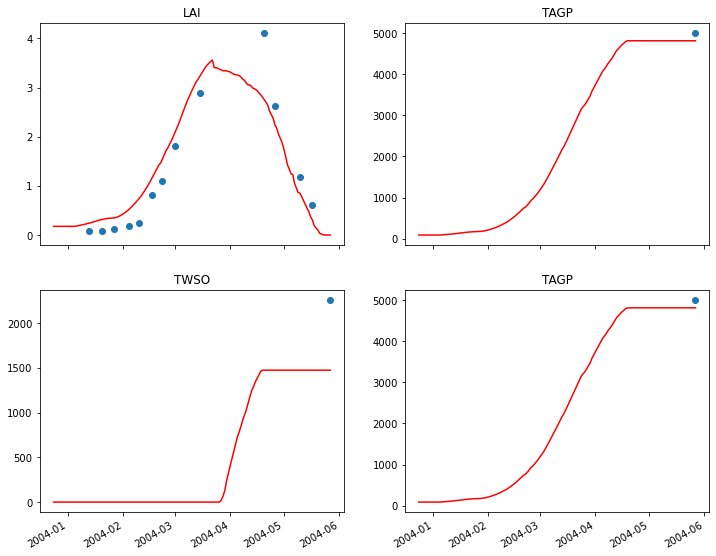

In [6]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("sortie_V6.xls")

sortie_V4 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2003_2004.xlsx' , sheet_name='V6') 
result = sortie_V4.set_index("day")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'r-')
    ax.set_title(var)
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()